## Multiclass Classification: Political parties: democrat, republican, independent

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [23]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

## Digit image files stored as an array (Size 64 = 8x8 image)

In [11]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

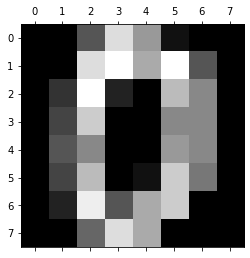

In [12]:
plt.gray()
plt.matshow(digits.images[0])

In [19]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [21]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [20]:
len(digits.target)

1797

In [22]:
len(digits.data)

1797

In [16]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="newton-cg", multi_class="auto")

In [31]:
model.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [32]:
model.score(x_test, y_test)

0.9694444444444444

## Parameter needs to be multi-dimensional (list of lists, brackets around the outside). We are using 'digits.data' because our model takes numerical data,

In [38]:
model.predict([digits.data[0]])

array([0])

In [39]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

## 'y_predicted' = array of values predicted by model. 'y_test' = array of actual values for our 'x_test' binary images.

In [40]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  1,  1,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 32]], dtype=int64)

## Confusion Matrix: 35 times, the predicted value was 0, and the true answer was 0. 34 times, the predicted value was 1, and the true answer was 1, etc.

Text(69.0, 0.5, 'Truth')

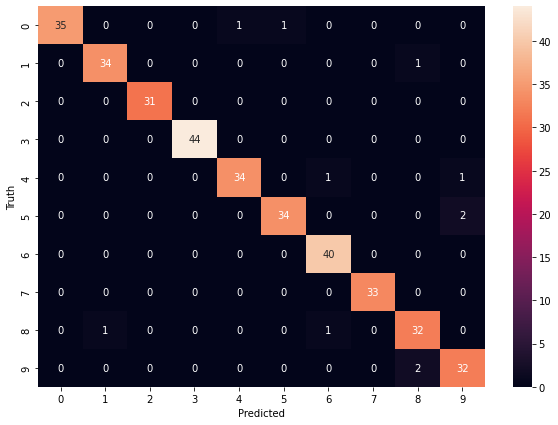

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")